In [34]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas_datareader import data as web
# For time stamps
from datetime import datetime

In [35]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [36]:
end = datetime.now()
start=datetime(end.year-1,end.month,end.day) # a year ago data

In [37]:
# Scrape the data from Yahoo Finance

data=pd.DataFrame()
for stock in tech_list:
    stock_data=web.DataReader(stock,"iex",start,end)
    stock_data['name']=stock
    data=data.append(stock_data)

2y
2y
2y
2y


In [38]:
AAPL=data[data.name=='AAPL']
GOOG=data[data.name=='GOOG']
MSFT=data[data.name=='MSFT']
AMZN=data[data.name=='AMZN']

In [39]:
AAPL.describe() ## describe method only accounts for numerical variables

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,175.835957,177.288049,174.526641,175.958812,2.986789e+07
std,16.258720,16.392292,16.406164,16.480794,1.273980e+07
min,147.755900,149.568500,146.938200,148.307500,1.251979e+07
25%,165.609375,167.654625,163.918350,165.807825,2.080267e+07
50%,172.512700,173.501750,171.395700,172.622550,2.618599e+07
75%,186.573175,187.781875,185.481975,186.605525,3.548421e+07
max,226.510000,228.870000,226.000000,227.630000,8.659382e+07


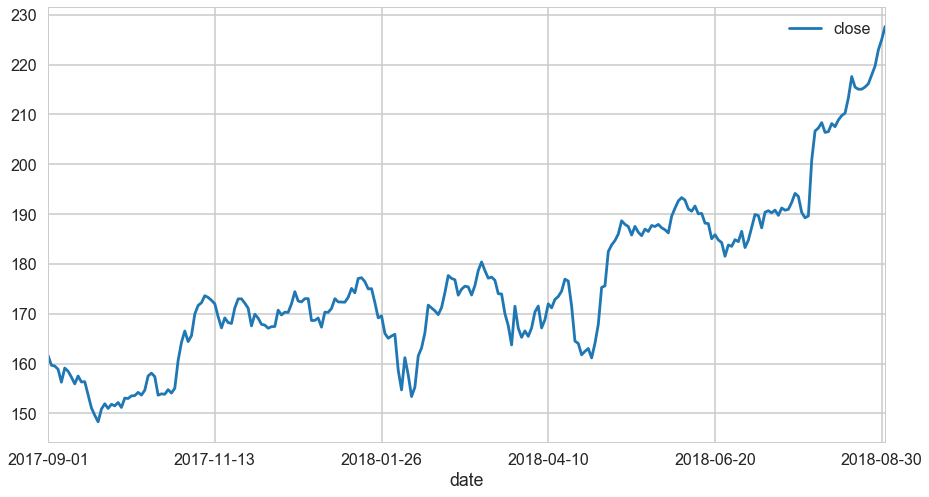

In [46]:
AAPL.close.plot(legend=True,figsize=(15,8))

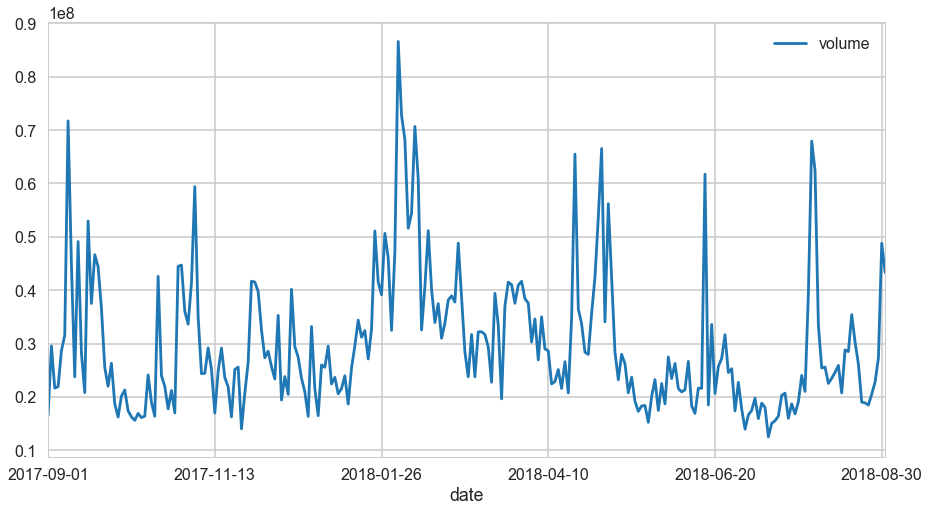

In [47]:
AAPL['volume'].plot(legend=True,figsize=(15,8))

In [43]:
# Moving Average for Stock Prices
ma_days=[10,20,50]

for ma in ma_days:
    col_name='MA for {} days'.format(ma)
    AAPL[col_name]=pd.rolling_mean(AAPL.close,ma)

/Users/zijianwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
/Users/zijianwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/zijianwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  import sys
/Users/zijianwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for S

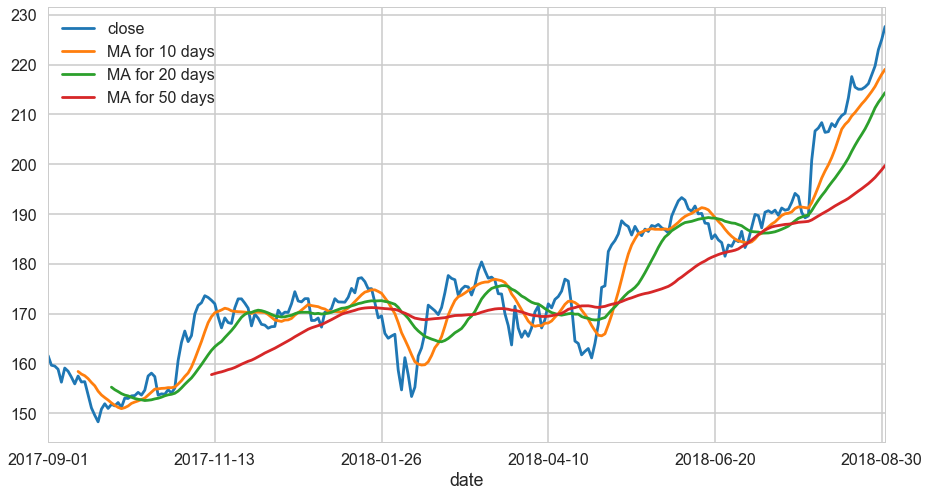

In [48]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,8))

/Users/zijianwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


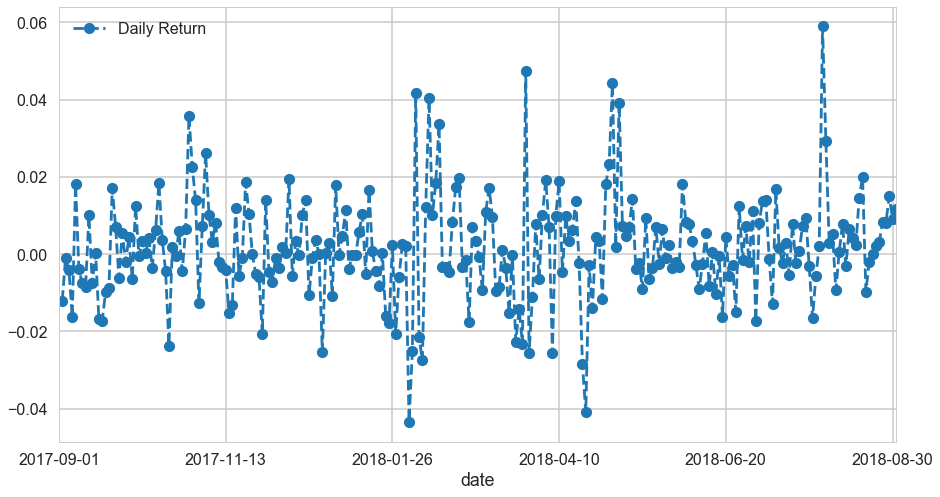

In [50]:
# Calcualte the daily return percentage for each day

'''
df.pct_change() for calculating daily return!!!!
'''
AAPL['Daily Return']=AAPL['close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,8),legend=True,linestyle='--',marker='o')

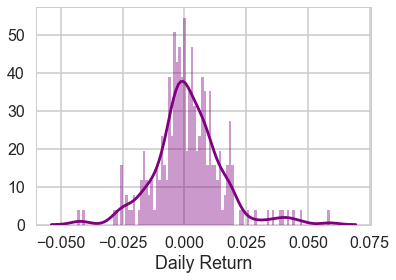

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

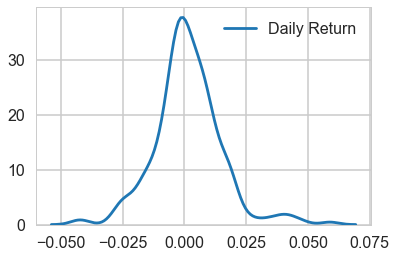

In [52]:
sns.kdeplot(AAPL['Daily Return'].dropna())

In [79]:
closing_df=DataFrame()
closing_df=pd.concat([closing_df,AAPL.close,GOOG.close,MSFT.close,AMZN.close],axis=1)
closing_df.columns=tech_list
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
2017-09-01,161.6064,937.34,72.6310,978.25
2017-09-05,159.6658,928.45,72.3068,965.27
2017-09-06,159.4983,927.81,72.1006,967.80
2017-09-07,158.8580,935.95,73.0239,979.47
2017-09-08,156.2672,926.50,72.6703,965.90


In [80]:
tech_rets=closing_df.pct_change()

In [81]:
tech_rets.head() # the first row will be Nan!

,AAPL,GOOG,MSFT,AMZN
2017-09-01,NaN,NaN,NaN,NaN
2017-09-05,-0.012008,-0.009484,-0.004464,-0.013269
2017-09-06,-0.001049,-0.000689,-0.002852,0.002621
2017-09-07,-0.004014,0.008773,0.012806,0.012058
2017-09-08,-0.016309,-0.010097,-0.004842,-0.013854


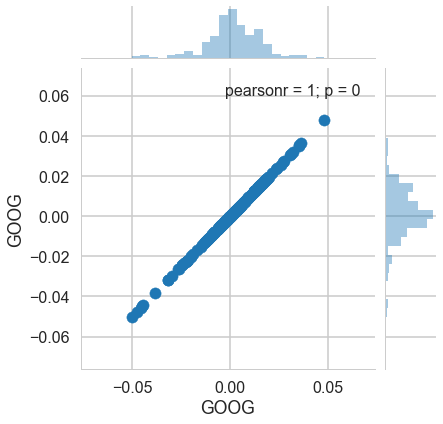

In [83]:
## for 2 numerical variables, using joint plot!!!
# example:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter')

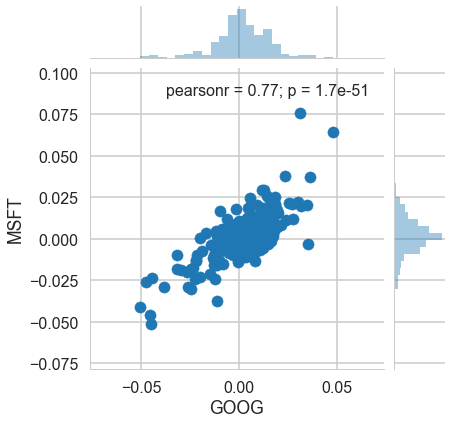

In [84]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

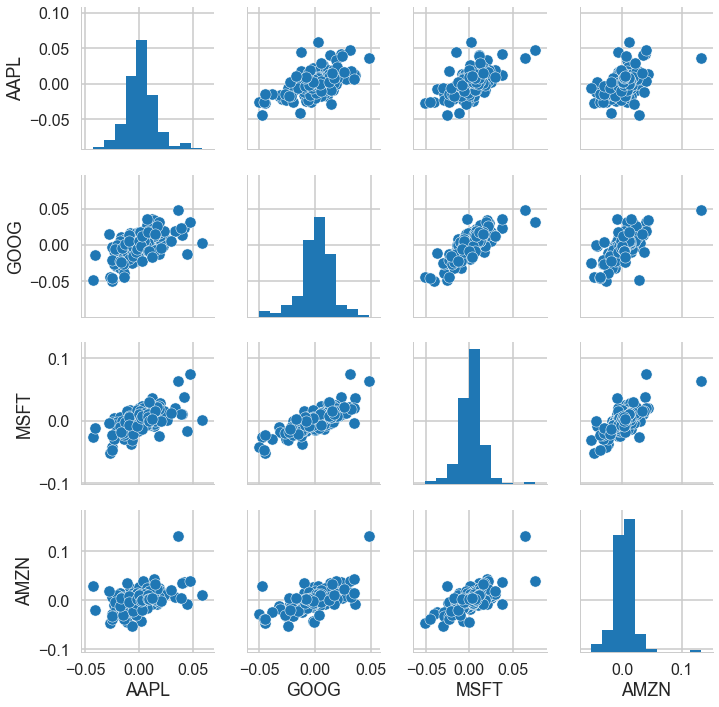

In [89]:
# Generator Correlation Scatter Plots for each combinations of numerical variables
sns.pairplot(tech_rets.dropna(),palette='winter')

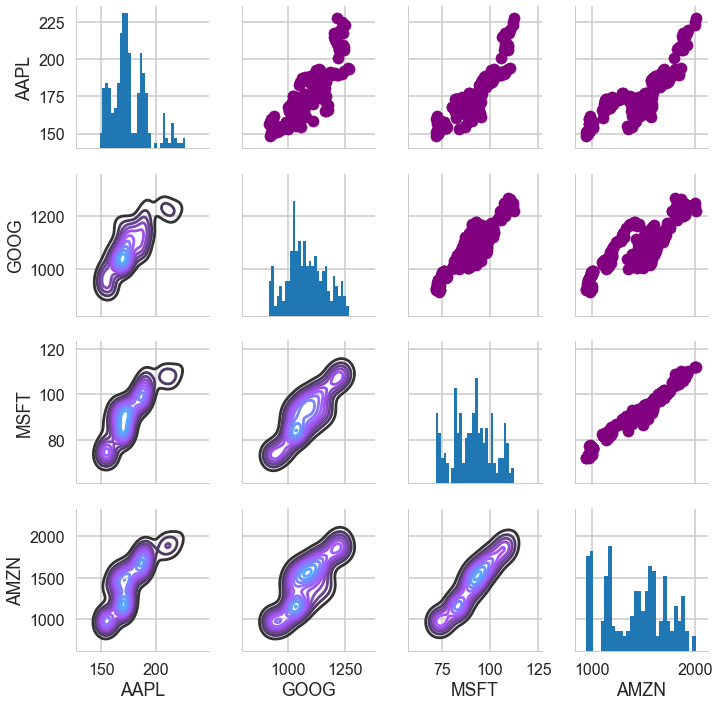

In [91]:
# Customize the Pairplot

returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

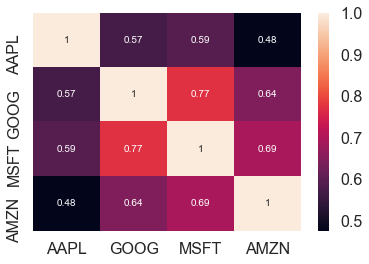

In [119]:
# Create the corrlation heatmap
sns.heatmap(tech_rets.corr(),annot=True)

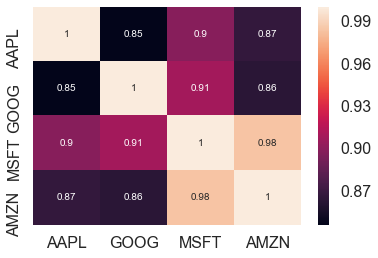

In [110]:
sns.heatmap(closing_df.corr(),annot=True)

In [120]:
# Stock Return Risk Analysis

In [121]:
rets=tech_rets.dropna()

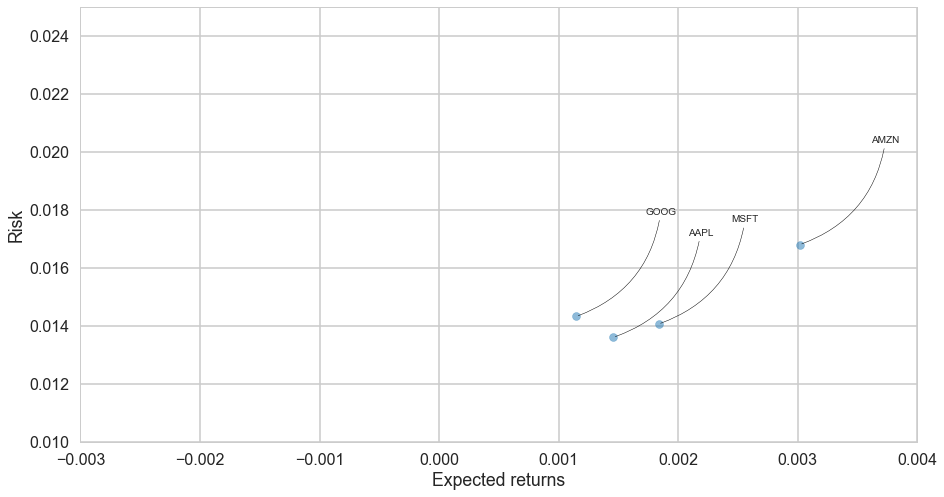

In [128]:
area = np.pi*20

plt.figure(figsize=(15,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s=area)


# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
# Value at Risk (VaR) Analysis

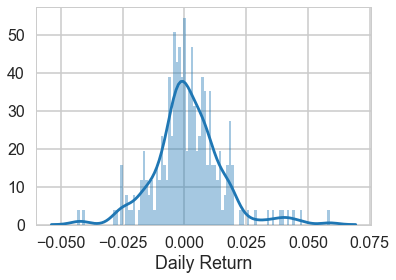

In [129]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [130]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
2017-09-05,-0.012008,-0.009484,-0.004464,-0.013269
2017-09-06,-0.001049,-0.000689,-0.002852,0.002621
2017-09-07,-0.004014,0.008773,0.012806,0.012058
2017-09-08,-0.016309,-0.010097,-0.004842,-0.013854
2017-09-11,0.018092,0.002785,0.010544,0.012486


In [131]:
rets['AAPL'].quantile(0.05)
# The 0.05 empirical quantile of daily returns is at -0.02072. That means that with 95% confidence, our worst daily loss will not exceed 2.07%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0207 * 1,000,000 = $2,070.

-0.020720678399972048

# A more advanced method for measuring VaR-- Monte Carlo Simulations

Value at Risk using the Monte Carlo method

This method suggests that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:


$ \frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$


Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$\Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t})$


In [133]:
# Set up our time horizon
days = 365

# Now our delta t
dt = 1/days

# Now grab mu (drift) from the expected return data for AAPL
mu = rets.mean()['GOOG']

# Now grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [138]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation, mu, sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

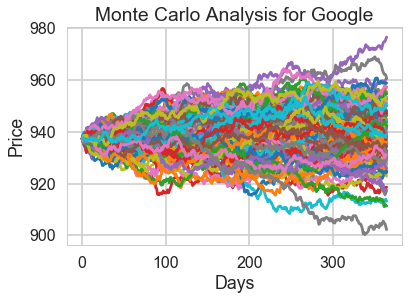

In [139]:
# Get start price from GOOG.head()

# Starting Price 937.34

start_price = 937.34

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [140]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

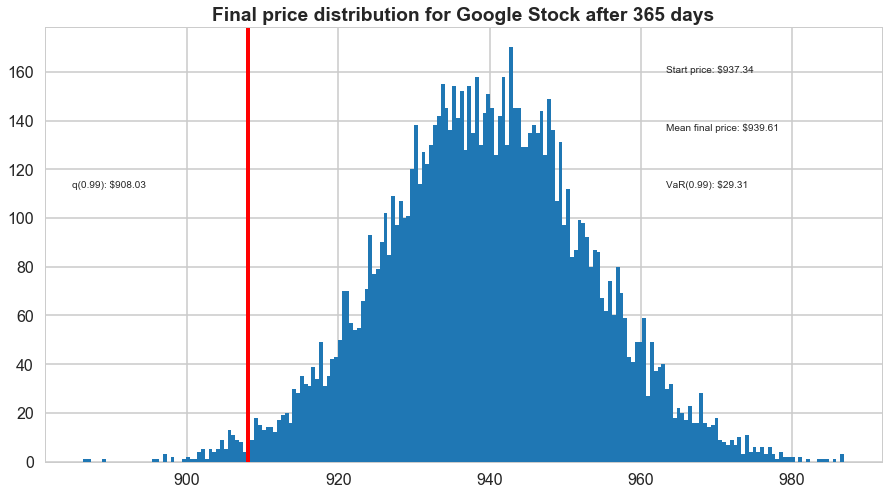

In [149]:
# Now define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now plot the distribution of the end prices
plt.figure(figsize=(15,8))
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.7, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.7, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.7, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');